In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [2]:
np.finfo(np.float64).precision

15

In [3]:
eps = np.finfo(np.float64).eps
eps

2.220446049250313e-16

In [4]:
np.random.seed(123456789)

In [5]:
sigmas = np.arange(0.1, 10.1, 0.1)
sizes = np.logspace(2, 5, 21, base=10).astype(int)

In [6]:
rv = np.empty((sigmas.size,), dtype=object)
xmean = np.full((3, sigmas.size, sizes.size), np.nan)
xstd = np.full((3, sigmas.size, sizes.size), np.nan)
xextent = np.full((2, sigmas.size, sizes.size), np.nan)
eps = np.finfo(np.float64).eps

In [7]:
# Iterate Shape Parameter:
for (i, s) in enumerate(sigmas):
    # Create Random Variable:
    rv[i] = stats.lognorm(s, loc=0, scale=1)
    # Iterate Sample Size:
    for (j, N) in enumerate(sizes):
        # Draw Samples:
        xs = rv[i].rvs(N)
        # Sample Extent:
        xextent[:,i,j] = [np.min(xs), np.max(xs)]
        # Warning: Check (max(x) + min(x)) < max(x)
        if (xextent[0,i,j] + xextent[1,i,j]) - xextent[1,i,j] < eps:
            warnings.warn("Potential Float Arithmetic Error: logN(mu=%.2f, sigma=%2f).sample(%d)" % (0, s, N))
        # Generate different Estimators:
        # Fit Parameters using MLE:
        fit = stats.lognorm.fit(xs, floc=0)
        xmean[0,i,j] = fit[2]
        xstd[0,i,j] = fit[0]
        # Naive (Bad Estimators because of Float Arithmetic Error):
        xmean[1,i,j] = np.mean(xs)*np.exp(-0.5*s**2)
        xstd[1,i,j] = np.sqrt(np.log(np.std(xs)**2*np.exp(-s**2)+1))
        # Log-transform:
        xmean[2,i,j] = np.exp(np.mean(np.log(xs)))
        xstd[2,i,j] = np.std(np.log(xs))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=4.300000).sample(17782)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=4.300000).sample(25118)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=4.300000).sample(70794)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=4.400000).sample(25118)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=4.400000).sample(35481)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic E

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=5.500000).sample(100000)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=5.600000).sample(1122)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=5.600000).sample(1584)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=5.600000).sample(3162)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=5.600000).sample(4466)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Erro

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=6.200000).sample(2238)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=6.200000).sample(3162)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=6.200000).sample(4466)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=6.200000).sample(6309)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=6.200000).sample(8912)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=6.800000).sample(70794)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=6.800000).sample(100000)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=6.900000).sample(100)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=6.900000).sample(281)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=6.900000).sample(398)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=7.400000).sample(100000)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=7.500000).sample(199)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=7.500000).sample(281)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=7.500000).sample(398)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=7.500000).sample(562)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: l

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=7.800000).sample(35481)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=7.800000).sample(50118)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=7.800000).sample(70794)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=7.800000).sample(100000)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=7.900000).sample(141)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Er

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=8.200000).sample(141)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=8.200000).sample(199)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=8.200000).sample(281)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=8.200000).sample(398)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=8.200000).sample(562)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=8.500000).sample(70794)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=8.500000).sample(100000)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=8.600000).sample(100)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=8.600000).sample(141)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=8.600000).sample(199)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=8.900000).sample(12589)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=8.900000).sample(17782)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=8.900000).sample(25118)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=8.900000).sample(35481)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=8.900000).sample(50118)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic E

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=9.200000).sample(100000)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=9.300000).sample(141)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=9.300000).sample(199)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=9.300000).sample(281)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=9.300000).sample(398)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: l

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=9.700000).sample(199)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=9.700000).sample(281)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=9.700000).sample(398)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=9.700000).sample(562)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=9.700000).sample(794)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=10.000000).sample(35481)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=10.000000).sample(50118)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=10.000000).sample(70794)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Potential Float Arithmetic Error: logN(mu=0.00, sigma=10.000000).sample(100000)
  del sys.path[0]


In [8]:
x = np.logspace(-5, 5, 1001)

In [9]:
Nidx = slice(None, None, 5)
sidx = slice(4, None, 15)

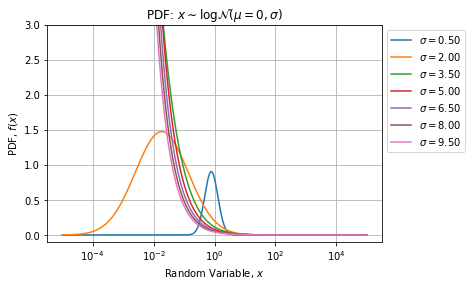

In [10]:
fig, axe = plt.subplots()
for r in rv[sidx]:
    axe.semilogx(x, r.pdf(x))
axe.set_ylim([-0.1, 3])
axe.set_title(r"PDF: $x \sim \log\mathcal{N}(\mu=0,\sigma)$")
axe.set_xlabel(r"Random Variable, $x$")
axe.set_ylabel(r"PDF, $f(x)$")
axe.grid()
lgd = axe.legend([r"$\sigma = %.2f$" % s for s in sigmas[sidx]] + ['Exact'], bbox_to_anchor=(1,1), loc='upper left')
fig.savefig('Lognorm_PDF_semilogx_Sigma.png', dpi=120, bbox_extra_artists=(lgd,), bbox_inches='tight')

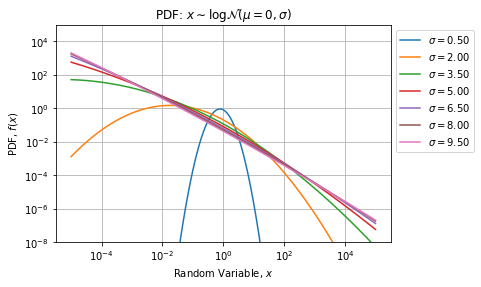

In [11]:
fig, axe = plt.subplots()
for r in rv[sidx]:
    axe.loglog(x, r.pdf(x))
axe.set_ylim([1e-8, 1e5])
axe.set_title(r"PDF: $x \sim \log\mathcal{N}(\mu=0,\sigma)$")
axe.set_xlabel(r"Random Variable, $x$")
axe.set_ylabel(r"PDF, $f(x)$")
axe.grid()
lgd = axe.legend([r"$\sigma = %.2f$" % s for s in sigmas[sidx]] + ['Exact'], bbox_to_anchor=(1,1), loc='upper left')
fig.savefig('Lognorm_PDF_loglog_Sigma.png', dpi=120, bbox_extra_artists=(lgd,), bbox_inches='tight')

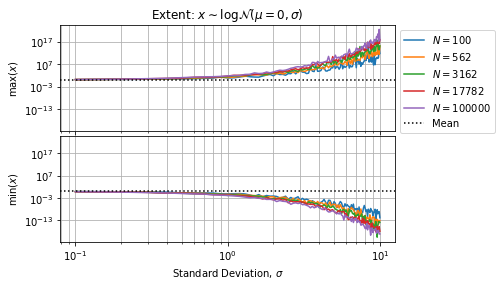

In [12]:
fig, axe = plt.subplots(2, 1, sharex=True, sharey=True, gridspec_kw={'hspace': 0.05})
axe[0].loglog(sigmas, xextent[1,:,Nidx])
axe[1].loglog(sigmas, xextent[0,:,Nidx])
axe[0].set_title(r"Extent: $x \sim \log\mathcal{N}(\mu=0,\sigma)$")
axe[1].set_xlabel(r"Standard Deviation, $\sigma$")
axe[0].set_ylabel(r"$\max(x)$")
axe[1].set_ylabel(r"$\min(x)$")
for i in range(2):
    axe[i].axhline(1, linestyle=':', color='k')
    axe[i].grid(which='both')
lgd = axe[0].legend([r"$N = %d$" % s for s in sizes[Nidx]] + [r'Mean'], bbox_to_anchor=(1,1), loc='upper left')
fig.savefig('Lognorm_Extent_Sigma.png', dpi=120, bbox_extra_artists=(lgd,), bbox_inches='tight')

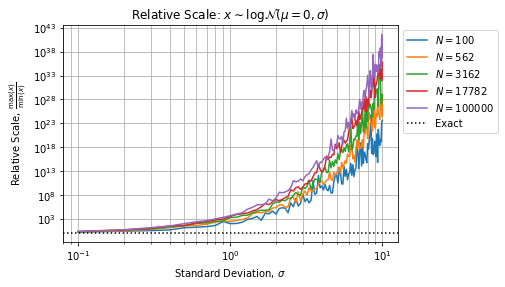

In [13]:
fig, axe = plt.subplots()
axe.loglog(sigmas, xextent[1,:,Nidx]/xextent[0,:,Nidx])
axe.axhline(1, linestyle=':', color='k')
axe.set_title(r"Relative Scale: $x \sim \log\mathcal{N}(\mu=0,\sigma)$")
axe.set_xlabel(r"Standard Deviation, $\sigma$")
axe.set_ylabel(r"Relative Scale, $\frac{\max(x)}{\min(x)}$")
lgd = axe.legend([r"$N = %d$" % s for s in sizes[Nidx]] + ['Exact'], bbox_to_anchor=(1,1), loc='upper left')
axe.grid(which='both')
fig.savefig('Lognorm_RelScale_Sigma.png', dpi=120, bbox_extra_artists=(lgd,), bbox_inches='tight')

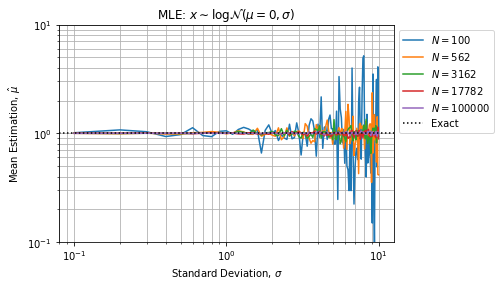

In [14]:
fig, axe = plt.subplots()
axe.loglog(sigmas, xmean[0,:,Nidx])
axe.axhline(1, linestyle=':', color='k')
axe.set_title(r"MLE: $x \sim \log\mathcal{N}(\mu=0,\sigma)$")
axe.set_xlabel(r"Standard Deviation, $\sigma$")
axe.set_ylabel(r"Mean Estimation, $\hat{\mu}$")
axe.set_ylim([0.1,10])
lgd = axe.legend([r"$N = %d$" % s for s in sizes[Nidx]] + ['Exact'], bbox_to_anchor=(1,1), loc='upper left')
axe.grid(which='both')
fig.savefig('Lognorm_MLE_Emean_Sigma.png', dpi=120, bbox_extra_artists=(lgd,), bbox_inches='tight')

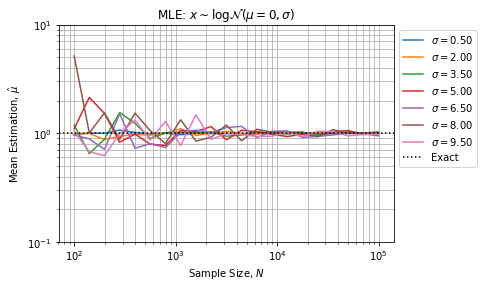

In [15]:
fig, axe = plt.subplots()
axe.loglog(sizes, xmean[0,sidx,:].T)
axe.axhline(1, linestyle=':', color='k')
axe.set_title(r"MLE: $x \sim \log\mathcal{N}(\mu=0,\sigma)$")
axe.set_xlabel(r"Sample Size, $N$")
axe.set_ylabel(r"Mean Estimation, $\hat{\mu}$")
axe.set_ylim([0.1,10])
lgd = axe.legend([r"$\sigma = %.2f$" % s for s in sigmas[sidx]] + ['Exact'], bbox_to_anchor=(1,1), loc='upper left')
axe.grid(which='both')
fig.savefig('Lognorm_MLE_Emean_Size.png', dpi=120, bbox_extra_artists=(lgd,), bbox_inches='tight')

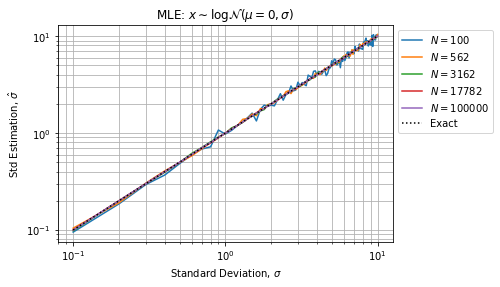

In [16]:
fig, axe = plt.subplots()
axe.loglog(sigmas, xstd[0,:,Nidx])
axe.loglog(sigmas, sigmas, linestyle=':', color='k')
axe.set_title(r"MLE: $x \sim \log\mathcal{N}(\mu=0,\sigma)$")
axe.set_xlabel(r"Standard Deviation, $\sigma$")
axe.set_ylabel(r"Std Estimation, $\hat{\sigma}$")
lgd = axe.legend([r"$N = %d$" % s for s in sizes[Nidx]] + ['Exact'], bbox_to_anchor=(1,1), loc='upper left')
axe.grid(which='both')
fig.savefig('Lognorm_MLE_Esigma_Sigma.png', dpi=120, bbox_extra_artists=(lgd,), bbox_inches='tight')

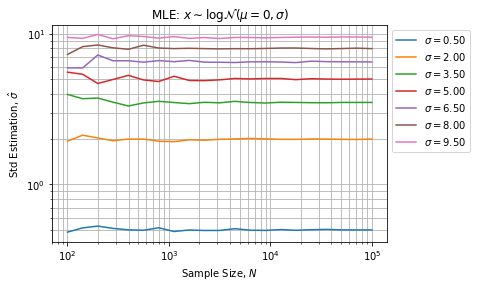

In [17]:
fig, axe = plt.subplots()
axe.loglog(sizes, xstd[0,sidx,:].T)
axe.set_title(r"MLE: $x \sim \log\mathcal{N}(\mu=0,\sigma)$")
axe.set_xlabel(r"Sample Size, $N$")
axe.set_ylabel(r"Std Estimation, $\hat{\sigma}$")
lgd = axe.legend([r"$\sigma = %.2f$" % s for s in sigmas[sidx]] + ['Exact'], bbox_to_anchor=(1,1), loc='upper left')
axe.grid(which='both')
fig.savefig('Lognorm_MLE_Esigma_Size.png', dpi=120, bbox_extra_artists=(lgd,), bbox_inches='tight')

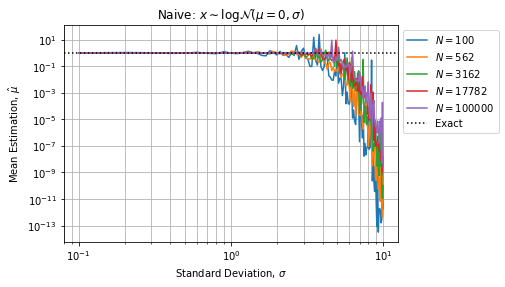

In [18]:
fig, axe = plt.subplots()
axe.loglog(sigmas, xmean[1,:,Nidx])
axe.axhline(1, linestyle=':', color='k')
axe.set_title(r"Naive: $x \sim \log\mathcal{N}(\mu=0,\sigma)$")
axe.set_xlabel(r"Standard Deviation, $\sigma$")
axe.set_ylabel(r"Mean Estimation, $\hat{\mu}$")
lgd = axe.legend([r"$N = %d$" % s for s in sizes[Nidx]] + ['Exact'], bbox_to_anchor=(1,1), loc='upper left')
axe.grid(which='both')
fig.savefig('Lognorm_Naive_Emean_Sigma.png', dpi=120, bbox_extra_artists=(lgd,), bbox_inches='tight')

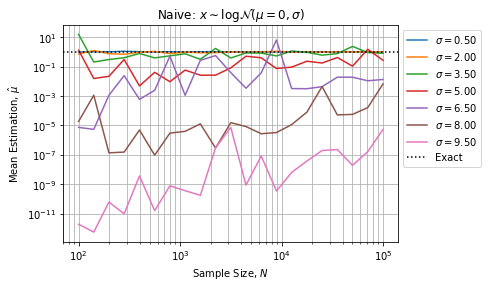

In [19]:
fig, axe = plt.subplots()
axe.loglog(sizes, xmean[1,sidx,:].T)
axe.axhline(1, linestyle=':', color='k')
axe.set_title(r"Naive: $x \sim \log\mathcal{N}(\mu=0,\sigma)$")
axe.set_xlabel(r"Sample Size, $N$")
axe.set_ylabel(r"Mean Estimation, $\hat{\mu}$")
lgd = axe.legend([r"$\sigma = %.2f$" % s for s in sigmas[sidx]] + ['Exact'], bbox_to_anchor=(1,1), loc='upper left')
axe.grid(which='both')
fig.savefig('Lognorm_Naive_Emean_Size.png', dpi=120, bbox_extra_artists=(lgd,), bbox_inches='tight')

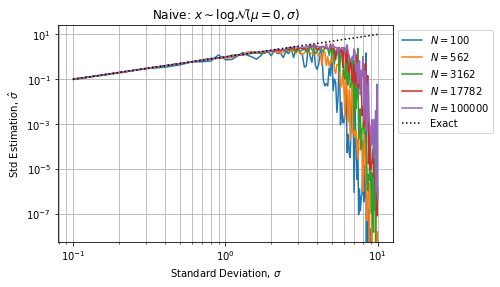

In [20]:
fig, axe = plt.subplots()
axe.loglog(sigmas, xstd[1,:,Nidx])
axe.loglog(sigmas, sigmas, linestyle=':', color='k')
axe.set_title(r"Naive: $x \sim \log\mathcal{N}(\mu=0,\sigma)$")
axe.set_xlabel(r"Standard Deviation, $\sigma$")
axe.set_ylabel(r"Std Estimation, $\hat{\sigma}$")
lgd = axe.legend([r"$N = %d$" % s for s in sizes[Nidx]] + ['Exact'], bbox_to_anchor=(1,1), loc='upper left')
axe.grid(which='both')
fig.savefig('Lognorm_Naive_Esigma_Sigma.png', dpi=120, bbox_extra_artists=(lgd,), bbox_inches='tight')

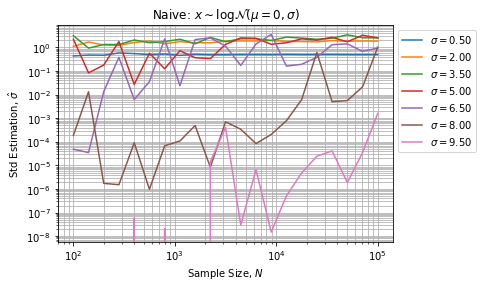

In [21]:
fig, axe = plt.subplots()
axe.loglog(sizes, xstd[1,sidx,:].T)
axe.set_title(r"Naive: $x \sim \log\mathcal{N}(\mu=0,\sigma)$")
axe.set_xlabel(r"Sample Size, $N$")
axe.set_ylabel(r"Std Estimation, $\hat{\sigma}$")
lgd = axe.legend([r"$\sigma = %.2f$" % s for s in sigmas[sidx]] + ['Exact'], bbox_to_anchor=(1,1), loc='upper left')
axe.grid(which='both')
fig.savefig('Lognorm_Naive_Esigma_Size.png', dpi=120, bbox_extra_artists=(lgd,), bbox_inches='tight')

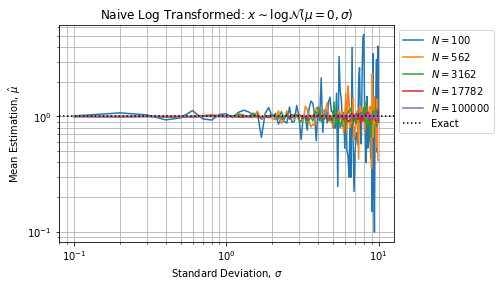

In [22]:
fig, axe = plt.subplots()
idx = slice(None, None, 5)
axe.loglog(sigmas, xmean[2,:,Nidx])
axe.axhline(1, linestyle=':', color='k')
axe.set_title(r"Naive Log Transformed: $x \sim \log\mathcal{N}(\mu=0,\sigma)$")
axe.set_xlabel(r"Standard Deviation, $\sigma$")
axe.set_ylabel(r"Mean Estimation, $\hat{\mu}$")
lgd = axe.legend([r"$N = %d$" % s for s in sizes[Nidx]] + ['Exact'], bbox_to_anchor=(1,1), loc='upper left')
axe.grid(which='both')
fig.savefig('Lognorm_NaiveLog_Emean_Sigma.png', dpi=120, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [23]:
np.allclose(xmean[0,:,:], xmean[2,:,:])

True

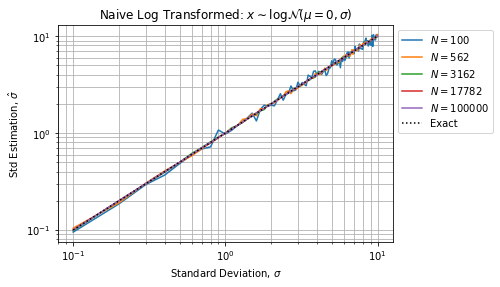

In [24]:
fig, axe = plt.subplots()
axe.loglog(sigmas, xstd[2,:,Nidx])
axe.loglog(sigmas, sigmas, linestyle=':', color='k')
axe.set_title(r"Naive Log Transformed: $x \sim \log\mathcal{N}(\mu=0,\sigma)$")
axe.set_xlabel(r"Standard Deviation, $\sigma$")
axe.set_ylabel(r"Std Estimation, $\hat{\sigma}$")
lgd = axe.legend([r"$N = %d$" % s for s in sizes[Nidx]] + ['Exact'], bbox_to_anchor=(1,1), loc='upper left')
axe.grid(which='both')
fig.savefig('Lognorm_Naive_Esigma_Sigma.png', dpi=120, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [25]:
np.allclose(xstd[0,:,:], xstd[2,:,:])

True